In [5]:
import mne
from mne.stats import permutation_cluster_test, permutation_t_test

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# The event number we are analyzing
event = 1

# Load epochs cropped per event
short_epochs_e = mne.read_epochs(f"cropped_to_events/epochs_short_t1_e{event}.fif", preload=True)
long_epochs_e = mne.read_epochs(f"cropped_to_events/epochs_long_t1_e{event}.fif", preload=True)

Reading c:\Users\annad\Documents\Thesis\Python scripts\cropped_to_events\epochs_short_t1_e1.fif ...
    Found the data of interest:
        t =       0.00 ...      37.11 ms
        0 CTF compensation matrices available


C:\Users\annad\AppData\Local\Temp\ipykernel_11396\4110529773.py:5: RuntimeWarning: This filename (cropped_to_events/epochs_short_t1_e1.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  short_epochs_e = mne.read_epochs(f"cropped_to_events/epochs_short_t1_e{event}.fif", preload=True)


Not setting metadata
10527 matching events found
No baseline correction applied
0 projection items activated
Reading c:\Users\annad\Documents\Thesis\Python scripts\cropped_to_events\epochs_long_t1_e1.fif ...
    Found the data of interest:
        t =       0.00 ...      37.11 ms
        0 CTF compensation matrices available


C:\Users\annad\AppData\Local\Temp\ipykernel_11396\4110529773.py:6: RuntimeWarning: This filename (cropped_to_events/epochs_long_t1_e1.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  long_epochs_e = mne.read_epochs(f"cropped_to_events/epochs_long_t1_e{event}.fif", preload=True)


Not setting metadata
10529 matching events found
No baseline correction applied
0 projection items activated


Using a threshold of 3.841901
stat_fun(H1): min=0.0001010458254435903 max=200.95654178491287
Running initial clustering …
Found 4 clusters


C:\Users\annad\AppData\Local\Temp\ipykernel_16016\72368791.py:2: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  long_epochs_e_avg = long_epochs_e.pick(['Pz', 'CPz', 'Cz']).get_data().mean(axis=1)
C:\Users\annad\AppData\Local\Temp\ipykernel_16016\72368791.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  short_epochs_e_avg = short_epochs_e.pick(['Pz', 'CPz', 'Cz']).get_data().mean(axis=1)
C:\Users\annad\AppData\Local\Temp\ipykernel_16016\72368791.py:9: RuntimeWarning: Ignoring argument "tail", performing 1-tailed F-test
  T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X, n_permutations=n_permutations)


  0%|          | Permuting : 0/4999 [00:00<?,       ?it/s]

Observed t-values per time point: [6.64042442e+01 9.05153335e+01 1.14009748e+02 1.35680760e+02
 1.55418171e+02 1.75994717e+02 1.94813637e+02 2.00956542e+02
 1.94683721e+02 1.79401080e+02 1.63801437e+02 1.55738331e+02
 1.44626604e+02 1.20517825e+02 8.88555979e+01 6.15368452e+01
 4.27337983e+01 2.86443157e+01 1.73153161e+01 9.94852632e+00
 6.42851343e+00 4.86497407e+00 3.51628280e+00 2.11229898e+00
 1.22011181e+00 8.76461093e-01 6.00631586e-01 1.31219558e-01
 8.01385838e-02 7.46211242e-01 1.38495286e+00 1.71418117e+00
 2.10709765e+00 2.70614223e+00 3.35211161e+00 4.20124823e+00
 5.77631656e+00 8.05582504e+00 9.74434555e+00 9.42136007e+00
 7.34748538e+00 4.97310470e+00 3.36408566e+00 2.71816354e+00
 2.77109552e+00 2.98193576e+00 2.60322463e+00 1.55670256e+00
 6.95053434e-01 4.17252228e-01 4.74915139e-01 4.55575794e-01
 1.38256524e-01 1.02272023e-02 1.55147553e-01 1.27149794e-01
 5.30240232e-02 1.24839539e-01 5.73390474e-01 1.23176352e+00
 1.15226308e+00 4.41583283e-01 6.55431665e-02 4.171

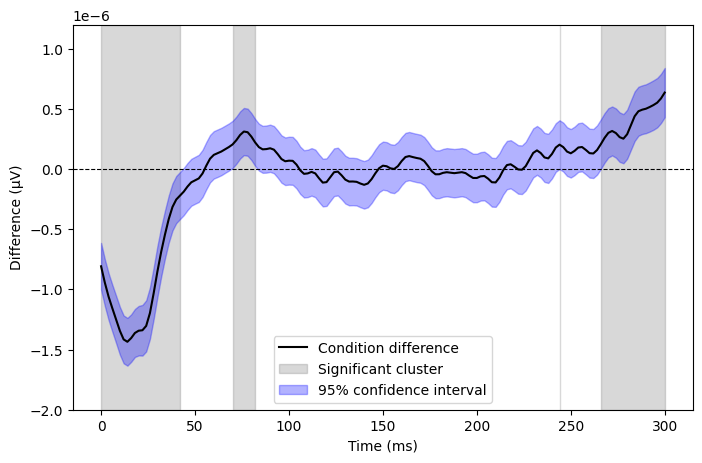

In [ ]:
# ==== PERMUTATION CLUSTER TEST ====

# Average over channels. Leave out pick() function if you want all electrodes
long_epochs_e_avg = long_epochs_e.pick(['Pz', 'CPz', 'Cz']).get_data().mean(axis=1)
short_epochs_e_avg = short_epochs_e.pick(['Pz', 'CPz', 'Cz']).get_data().mean(axis=1)

X = [long_epochs_e_avg, short_epochs_e_avg]  # MNE expects a list of (n_epochs, n_samples) arrays
n_permutations = 5000  # Number of permutations

# Run permutation cluster test (independent samples)
T_obs, clusters, cluster_p_values, H0 = permutation_cluster_test(X, n_permutations=n_permutations)

print("Observed t-values per time point:", T_obs)
print("Cluster p-values:", cluster_p_values)
print("Clusters:", clusters)

time = np.linspace(0, 40, len(T_obs))  # 40 ms event width

# Compute the mean of each condition across trials and then difference between them
mean_group1 = np.mean(long_epochs_e_avg, axis=0)
mean_group2 = np.mean(short_epochs_e_avg, axis=0)
difference = mean_group1 - mean_group2

# Plot the difference waveform
plt.figure(figsize=(8, 5))
plt.plot(time, difference, label="Condition difference", color="black")

# Highlight significant clusters
for i, cluster in enumerate(clusters):
    time_indices = cluster[0]
    plt.axvspan(time[time_indices[0]], time[time_indices[-1]], 
                color='gray', alpha=0.3, label="Significant cluster" if i == 0 else None)

plt.axhline(0, color='black', linestyle='dashed', linewidth=0.8)  # Baseline
plt.ylim([-0.000002, 0.0000012])
plt.xlabel("Time (ms)")
plt.ylabel("Difference (µV)")
plt.title(f"")
plt.legend()
plt.show()

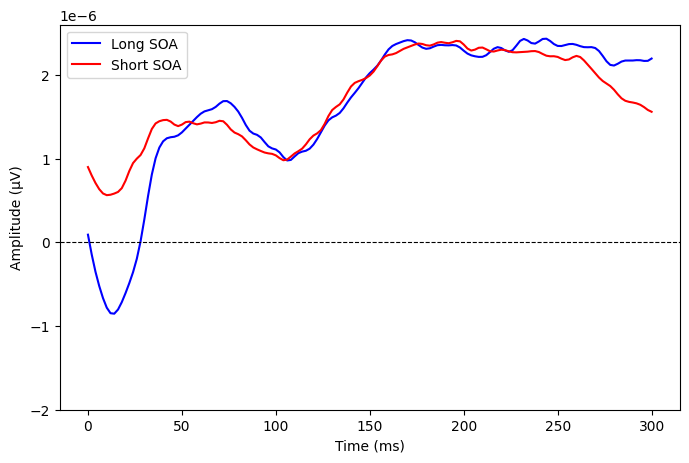

In [ ]:
# ==== PLOT ERPS ====

# Average across trials
erp_long = np.mean(long_epochs_e_avg, axis=0)
erp_short = np.mean(short_epochs_e_avg, axis=0)

plt.figure(figsize=(8, 5))
plt.plot(time, erp_long, label="Long SOA", color="blue")
plt.plot(time, erp_short, label="Short SOA", color="red")

# Add a zero line for reference
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Labels and Legend
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (µV)")
# plt.title("ERP Comparison of Two Conditions")
plt.legend(loc="upper left")
plt.ylim([-0.000002, 0.0000026])
plt.show()

C:\Users\annad\AppData\Local\Temp\ipykernel_16512\2291378557.py:7: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = long_epochs_e.get_data().mean(axis=2)[:len(short_epochs_e)] - short_epochs_e.get_data().mean(axis=2)
C:\Users\annad\AppData\Local\Temp\ipykernel_16512\2291378557.py:7: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  X = long_epochs_e.get_data().mean(axis=2)[:len(short_epochs_e)] - short_epochs_e.get_data().mean(axis=2)


Permuting 4999 times...
Number of significant sensors : 40
Sensors names : ['AF3', 'F1', 'F3', 'F5', 'FC3', 'FC1', 'C3', 'TP7', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'P6', 'P8', 'PO8', 'PO4', 'O2']


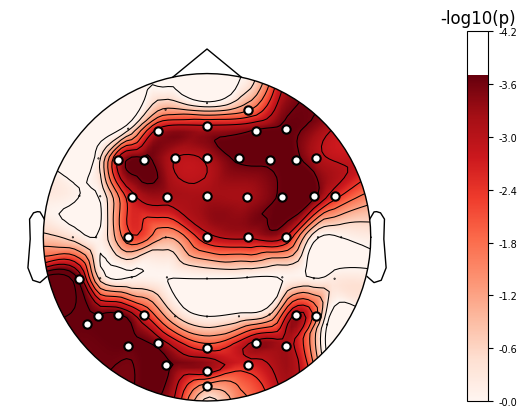

In [ ]:
# ==== PERMUTATION T-TEST ====

raw = long_epochs_e[0]
picks = mne.pick_types(raw.info, eeg=True, exclude=['Status', 'eog_h', 'eog_v'])

X = long_epochs_e.get_data().mean(axis=2) - short_epochs_e.get_data().mean(axis=2)

n_permutations = 5000
T0, p_values, H0 = permutation_t_test(X, n_permutations, n_jobs=None)

p_values = p_values[:64] # drop p-values of non-electrodes channels

significant_sensors = picks[p_values <= 0.05]
significant_sensors_names = [raw.ch_names[k] for k in significant_sensors]

print(f"Number of significant sensors : {len(significant_sensors)}")
print(f"Sensors names : {significant_sensors_names}")

raw.drop_channels(['Status', 'eog_h', 'eog_v'])

evoked = mne.EvokedArray(-np.log10(p_values)[:, np.newaxis], raw.info, tmin=0.0)

# Extract mask and indices of active sensors in the layout
mask = p_values[:, np.newaxis] <= 0.05

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 0.05]})

evoked.plot_topomap(axes=ax, ch_type="eeg", times=[0], scalings=1, vlim=(0.0, np.max), units="-log10(p)", cbar_fmt="-%0.1f",
                    mask=mask, size=3, show_names=lambda x: x[4:] + " " * 20, show=False)

ax[0].set_title(f"")
plt.show()